In [1]:
import numpy as np
import matplotlib.pylab as plt
from XY_diagonalisation import Sampling_Random_State as XY_model
import multitasking
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: left;
    text-align: center;
}
</style>
"""))

# Test for entropy of Ground State

In [2]:
F_minous, F_plus = XY_model.Get_Bands_Matrix(Ground=True)

In [3]:
result=[]
for i in range(2,100):
    Cov_matrix=XY_model.Covariance_matrix_from_sub_sample(F_plus,F_minous,i)
    S = np.linalg.svd(Cov_matrix,compute_uv=False)
    result.append(np.sum(XY_model.Binary_entropy(-S+0.5)))

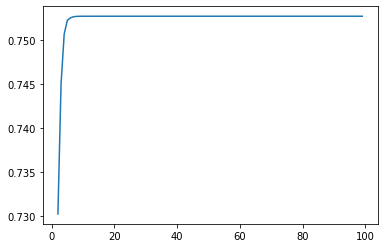

In [4]:
plt.plot(range(2,100),result)
plt.show()

# Test for Random excited state

In [5]:
F_minous, F_plus = XY_model.Get_Bands_Matrix(Ground=False)

In [6]:
result=[]
for i in range(2,1000,5):
    Cov_matrix=XY_model.Covariance_matrix_from_sub_sample(F_plus,F_minous,i)
    S = np.linalg.svd(Cov_matrix,compute_uv=False)
    result.append(np.sum(XY_model.Binary_entropy(-S+0.5)))

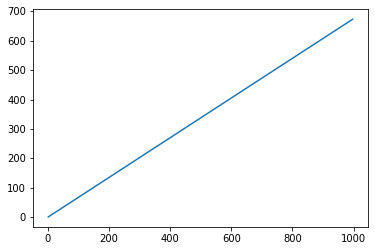

In [7]:
plt.plot(range(2,1000,5),result)
plt.show()

In [7]:
from XY_diagonalisation import Computations_XY_model as cosa
import matplotlib.pylab as plt
import numpy as np
from IPython.display import clear_output
import signal
import multitasking
signal.signal(signal.SIGINT, multitasking.wait_for_tasks)

Hello 1 (sleeping for 1.0s)
Hello 2 (sleeping for 0.5s)
Hello 3 (sleeping for 0.5s)
Hello 4 (sleeping for 0.5s)


In [2]:
F_minous,F_plus=cosa.Get_Bands_Matrix()

In [4]:
a,b =cosa.Compute_Spectrum_Random_Distribution_Associated(F_minous,F_plus,30)

In [ ]:
import warnings

In [6]:
M=cosa.Compute_Density_Matrix_Random_State(F_minous,F_plus,50)

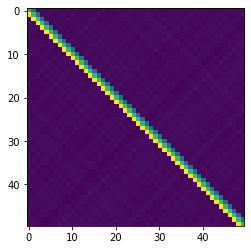

In [7]:
plt.imshow(M.real)

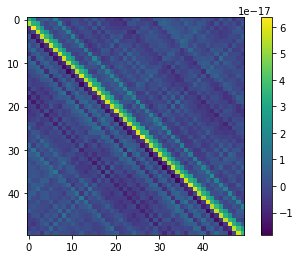

In [5]:
plt.imshow(M.imag)
plt.colorbar()

In [11]:
cosa.get_band_of_matrix(M.imag,M.shape[0]-1)

array([3.76479404e-18])

In [12]:
result = []
for i in range(-M.shape[0]+1,M.shape[0],1):
    result.append(np.mean(cosa.get_band_of_matrix(M.imag,i)))

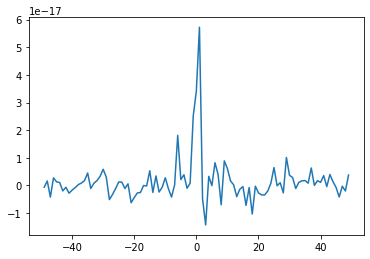

In [13]:
plt.plot(range(-M.shape[0]+1,M.shape[0],1),result)

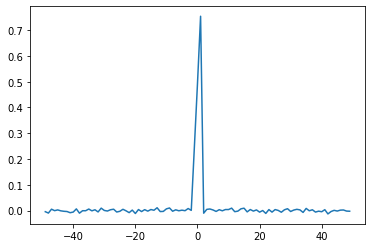

In [14]:
result = []
for i in range(-M.shape[0]+1,M.shape[0],1):
    result.append(np.mean(cosa.get_band_of_matrix(M.real,i)))
plt.plot(range(-M.shape[0]+1,M.shape[0],1),result)

In [32]:
M[0,49]

(-0.0044182901678349725-6.552317246989713e-19j)

In [28]:
np.where(M==cosa.get_band_of_matrix(M,49))

(array([49]), array([0]))

In [33]:
cosa.get_band_of_matrix(M,-48)

array([-0.00901288-4.19066977e-20j, -0.01055058+3.27665461e-18j])

In [8]:
import pyfftw
pyfftw.config.NUM_THREADS = 1

Hello 1 (sleeping for 4.0s)
Hello 2 (sleeping for 1.0s)
Hello 3 (sleeping for 2.0s)
Hello 4 (sleeping for 3.5s)


In [29]:
import numpy as np
import matplotlib.pylab as plt
from XY_diagonalisation import Computations_XY_model as XY_model
from tqdm.notebook import tqdm

In [27]:
Data = np.zeros((20,XY_model.N_size,2))

In [28]:
for i in tqdm(range(20)):
    a,b = XY_model.Get_Bands_Matrix_local()
    Data[i,:,0]=a.real
    Data[i,:,1]=b.real

/Users/josealejandromontanacortes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [31]:
F_m,F_p = np.mean(Data[:,:,0],axis=0), np.mean(Data[:,:,1],axis=0)

In [41]:
M_avg = XY_model.Covariance_matrix_from_sub_sample(F_m,F_p,L=1000)

In [42]:
M= np.zeros((1000,1000))
for i in range(20):
    F_m,F_p = Data[i,:,0],Data[i,:,1]
    M+=XY_model.Covariance_matrix_from_sub_sample(F_m,F_p,L=1000)/20

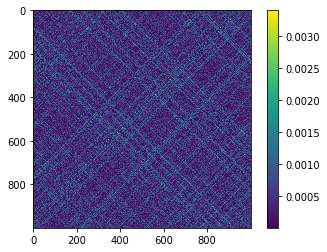

In [43]:
plt.imshow(np.abs(M-M_avg))
plt.colorbar()

In [45]:
np.sum((M-M_avg)**2)

0.4531890531508533

In [1]:
import numpy as np
import matplotlib.pylab as plt
from XY_diagonalisation import Computations_XY_model as XY_model
from tqdm.notebook import tqdm

In [3]:
Data = np.zeros((20,XY_model.N_size,2))
for i in tqdm(range(20)):
    a,b = XY_model.Get_Bands_Matrix_local()
    Data[i,:,0]=a.real
    Data[i,:,1]=b.real

NameError: name 'Data' is not defined

In [ ]:
error = []

In [49]:
for L in tqdm(range(20,500)):
    F_m,F_p = np.mean(Data[:,:,0],axis=0), np.mean(Data[:,:,1],axis=0)
    M_avg = XY_model.Covariance_matrix_from_sub_sample(F_m,F_p,L=L)
    M= np.zeros((L,L))
    for i in range(20):
        F_m,F_p = Data[i,:,0],Data[i,:,1]
        M+=XY_model.Covariance_matrix_from_sub_sample(F_m,F_p,L=L)/20
    error.append(np.sum(np.square(M_avg-M)))

In [52]:
for L in tqdm(range(500,200)):
    F_m,F_p = np.mean(Data[:,:,0],axis=0), np.mean(Data[:,:,1],axis=0)
    M_avg = XY_model.Covariance_matrix_from_sub_sample(F_m,F_p,L=L)
    M= np.zeros((L,L))
    for i in range(20):
        F_m,F_p = Data[i,:,0],Data[i,:,1]
        M+=XY_model.Covariance_matrix_from_sub_sample(F_m,F_p,L=L)/20
    error.append(np.sum(np.square(M_avg-M)))

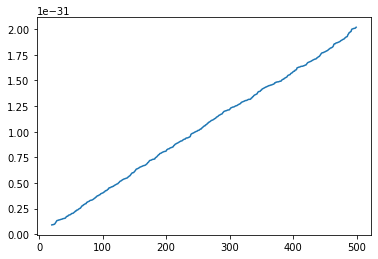

In [50]:
plt.plot(range(20,500),error)

In [ ]:
with open('test.pkl','wb') as f:
    pickle.dump(arr, f)

In [4]:
from concurrent.futures import ThreadPoolExecutor

In [1]:
from multiprocessing import Pool
import numpy as np
import matplotlib.pylab as plt
from XY_diagonalisation import Computations_XY_model as XY_model
from tqdm.notebook import tqdm
def Fourier(L):
    Data = np.zeros((XY_model.N_size,2))
    a,b = XY_model.Get_Bands_Matrix_local()
    Data[:,0]=a.real
    Data[:,1]=b.real
    return Data

In [35]:
with Pool() as p:
    Data =np.array(p.map(Fourier,range(20)))

In [36]:
error = []
for L in tqdm(range(20,2000,5)):
    F_m,F_p = np.mean(Data[:,:,0],axis=0), np.mean(Data[:,:,1],axis=0)
    M_avg = XY_model.Covariance_matrix_from_sub_sample(F_m,F_p,L=L)
    M= np.zeros((L,L))
    for i in range(20):
        F_m,F_p = Data[i,:,0],Data[i,:,1]
        M+=XY_model.Covariance_matrix_from_sub_sample(F_m,F_p,L=L)/20
    error.append(np.sum(np.square(M_avg-M)))

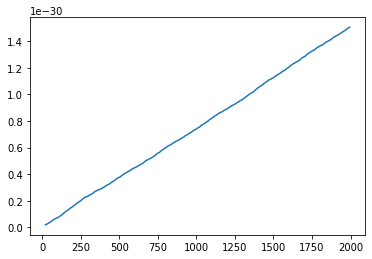

In [38]:
plt.plot(range(20,2000,5),error)

In [79]:
from multiprocessing import Pool
import numpy as np
import matplotlib.pylab as plt
from XY_diagonalisation import Computations_XY_model as XY_model
from tqdm.notebook import tqdm
from IPython.display import clear_output
import time

In [2]:
with Pool(3) as p:
    Data =np.array(p.map(XY_model.Simple_Fourier_Transform,range(20)))

In [4]:
error = []
for L in tqdm(range(20,2000,5)):
    F_m,F_p = np.mean(Data[:,:,0],axis=0), np.mean(Data[:,:,1],axis=0)
    M_avg = XY_model.Covariance_matrix_from_sub_sample(F_m,F_p,L=L)
    M= np.zeros((L,L))
    for i in range(20):
        F_m,F_p = Data[i,:,0],Data[i,:,1]
        M+=XY_model.Covariance_matrix_from_sub_sample(F_m,F_p,L=L)/20
    error.append(np.sum(np.square(M_avg-M)))

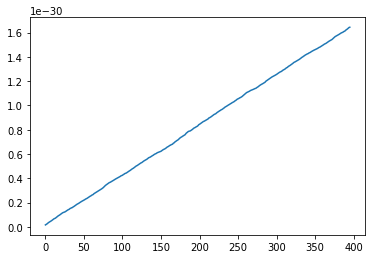

In [5]:
plt.plot(error)

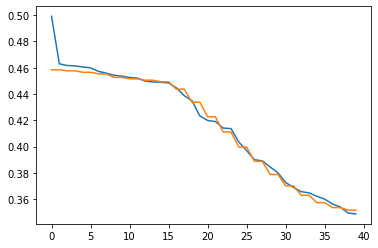

In [5]:
S_avg = np.zeros(40)
for i in range(50):
    S,fermi =XY_model.Compute_Spectrum_Random_Distribution_Associated(Data[i,:,0],Data[i,:,1],40)
    S_avg += np.array(S)/50
    plt.plot(S)
    plt.plot(fermi)
    plt.show()
    clear_output(wait=True)
    time.sleep(1)

In [6]:
L=40
New_cov_matrix=XY_model.Covariance_matrix_from_sub_sample(Data[0,:,0],Data[0,:,0],L)

In [7]:
S_2 = np.linalg.svd(New_cov_matrix.real,compute_uv=False)
S_t=[]
for i in np.linspace(0,1):
    alpha=i
    M_corner=np.zeros((L,L))
    M_corner[0,L-1],M_corner[L-1,0]=alpha*New_cov_matrix[1,0].real,alpha*New_cov_matrix[0,1].real
    S_1 = np.linalg.svd(New_cov_matrix.real+M_corner,compute_uv=False)
    S_t.append(S_1)

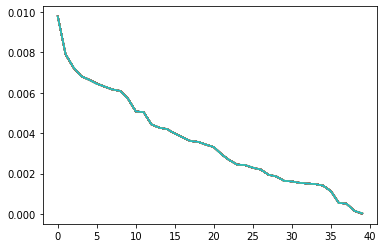

In [9]:

for i in range(len(S_t)):
    plt.plot(S_t[i])
plt.show()

In [11]:
M_corner=np.zeros((L,L))
Cov_matrix = New_cov_matrix.copy()
Cov_matrix[0,L-1],Cov_matrix[L-1,0] = 0,0
M_corner[0,L-1],M_corner[L-1,0]=New_cov_matrix[1,0].real,New_cov_matrix[0,1].real
S_1 = np.linalg.svd(Cov_matrix.real+M_corner,compute_uv=False)

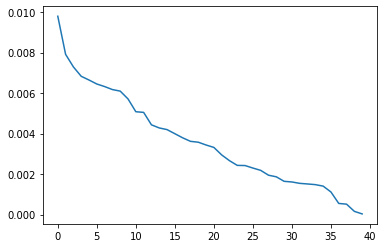

In [12]:
plt.plot(S_1)

In [13]:
L=40
New_cov_matrix=XY_model.Covariance_matrix_from_sub_sample(Data[:,:,0].mean(axis=0),Data[:,:,0].mean(axis=0),L)
S_2 = np.linalg.svd(New_cov_matrix.real,compute_uv=False)
M_corner=np.zeros((L,L))
Cov_matrix = New_cov_matrix.copy()
Cov_matrix[0,L-1],Cov_matrix[L-1,0] = 0,0
M_corner[0,L-1],M_corner[L-1,0]=New_cov_matrix[1,0].real,New_cov_matrix[0,1].real
S_1 = np.linalg.svd(Cov_matrix.real+M_corner,compute_uv=False)

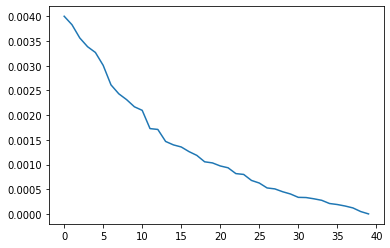

In [14]:
plt.plot(S_2)
plt.plot()

In [41]:
S,fermi =XY_model.Compute_Spectrum_Random_Distribution_Associated(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),30)

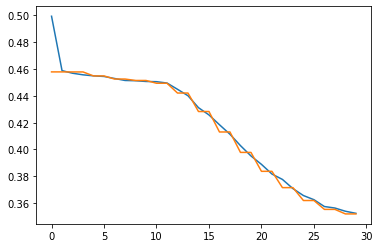

In [42]:
plt.plot(S)
plt.plot(fermi)

In [44]:
L=30
New_cov_matrix=XY_model.Covariance_matrix_from_sub_sample(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)
S_2 = np.linalg.svd(New_cov_matrix,compute_uv=False)
M_corner=np.zeros((L,L))
Cov_matrix = New_cov_matrix.copy()
Cov_matrix[0,L-1],Cov_matrix[L-1,0] = 0.,0.
M_corner[0,L-1],M_corner[L-1,0]=New_cov_matrix[1,0],New_cov_matrix[0,1]
S_1 = np.linalg.svd(Cov_matrix+M_corner,compute_uv=False)

In [45]:
S_2 = sorted(-S_2 +0.5,reverse=True)
S_1 = sorted(-S_1 +0.5,reverse=True)

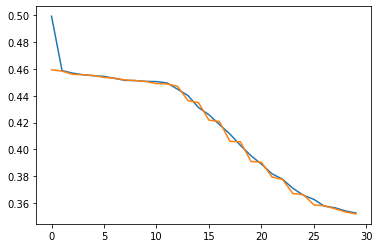

In [46]:
plt.plot(S_2)
plt.plot(S_1)

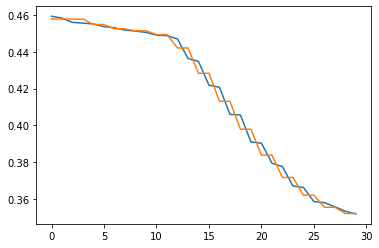

In [47]:
plt.plot(S_1)
plt.plot(fermi)

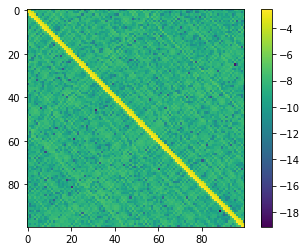

In [71]:
plt.imshow(np.log(np.abs(XY_model.Covariance_matrix_from_sub_sample(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),100))))
plt.colorbar()

ç´´´ç

In [76]:
hist,bins =np.histogram(np.log(np.abs(XY_model.Covariance_matrix_from_sub_sample(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),100))),bins=100)

<BarContainer object of 100 artists>

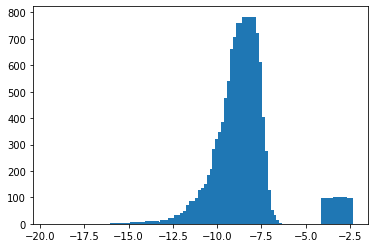

In [77]:
plt.bar(bins[:-1],hist)

In [67]:
x=np.log(np.abs(XY_model.Covariance_matrix_from_sub_sample(Data[:,:,0].mean(axis=0),Data[:,:,1].mean(axis=0),L)))

array([-3.00697389, -3.69652235, -2.58429184, -3.00475777, -3.70035874,
       -2.58555172, -3.0130393 , -3.71189404, -2.58932041, -3.00253501,
       -3.71266492, -2.58957122, -3.00941348, -3.70391394, -2.58671636,
       -3.01223171, -3.7106561 , -2.58891736, -3.0064782 , -3.71077023,
       -2.58895453, -3.01462474, -3.70390829, -2.58671451, -3.00915375,
       -3.72222509, -2.59267086, -3.00720946, -3.71459902, -2.59019991,
       -3.00486711, -3.70576663, -2.58732217, -3.00596275, -3.70535982,
       -2.58718921, -3.00158469, -3.72351047, -2.59308608, -3.00737924,
       -3.70291643, -2.58638987, -3.00759571, -3.71697636, -2.59097157,
       -3.00272634, -3.71408852, -2.59003405, -3.0088003 , -3.71797438,
       -2.59129515, -3.00346986, -3.70911058, -2.5884137 , -3.00679281,
       -3.7077229 , -2.58796104, -3.01028473, -3.71390716, -2.58997511,
       -3.0038081 , -3.71126319, -2.58911506, -3.00693023, -3.70011487,
       -2.58547173, -3.00207073, -3.70855366, -2.58823208, -3.00